Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

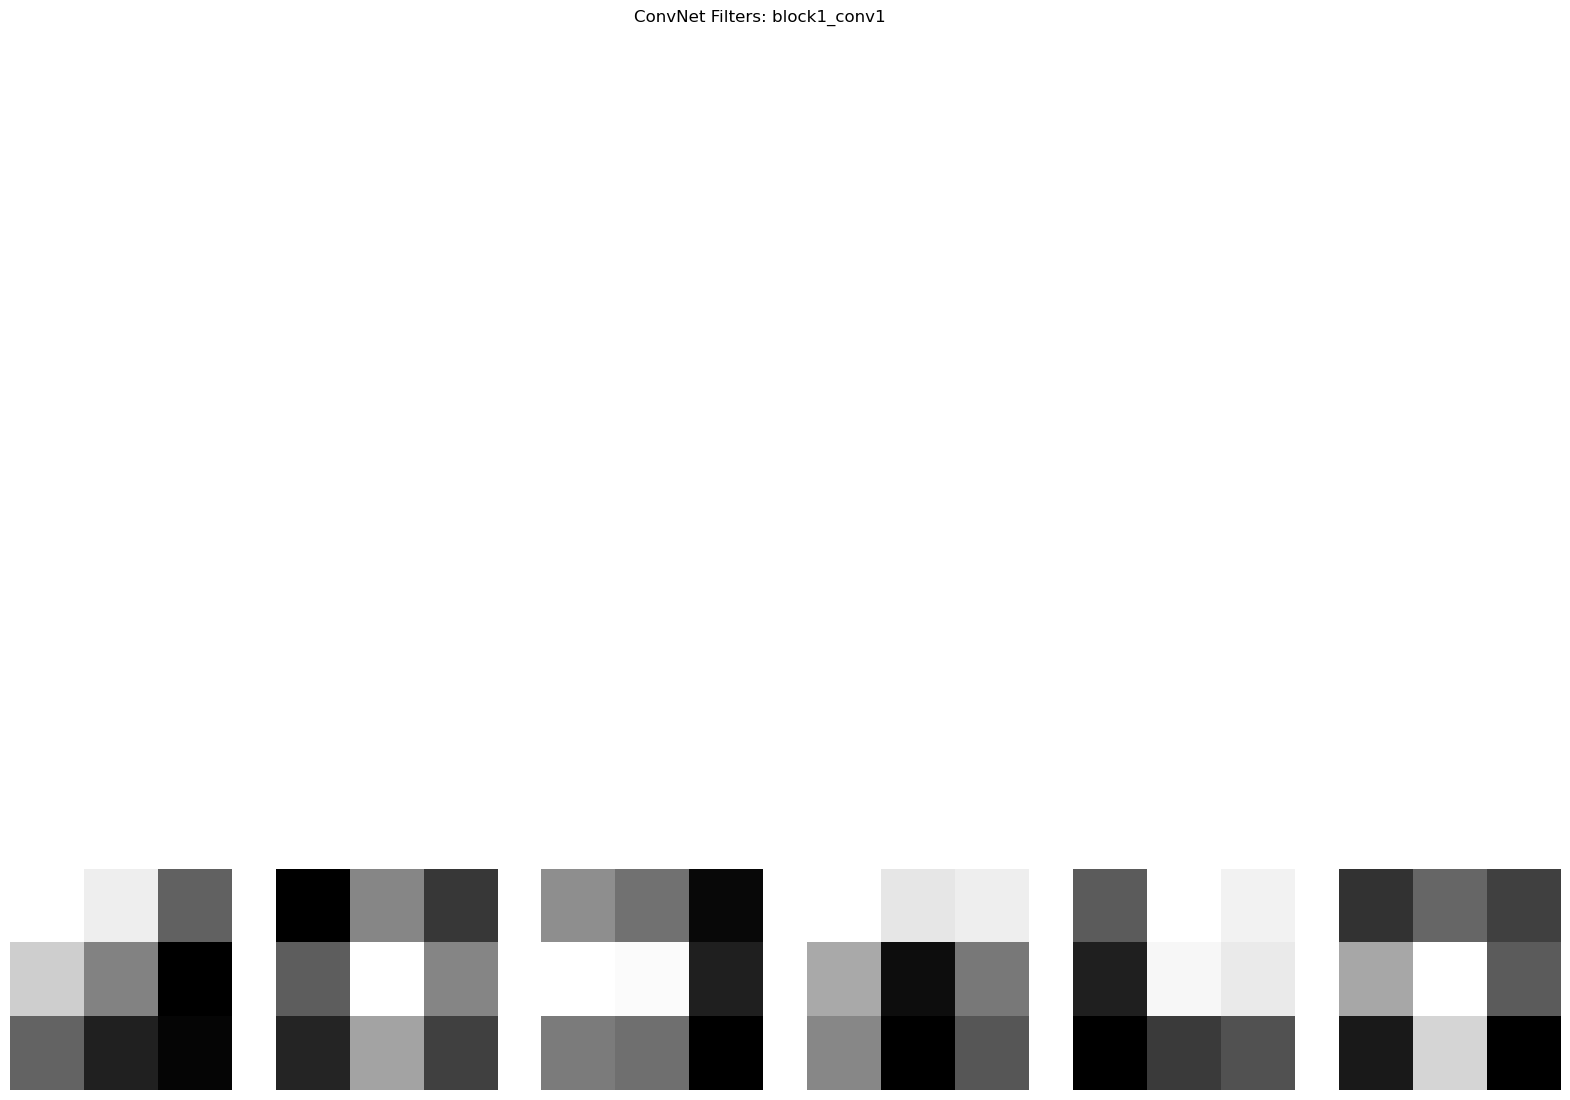

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


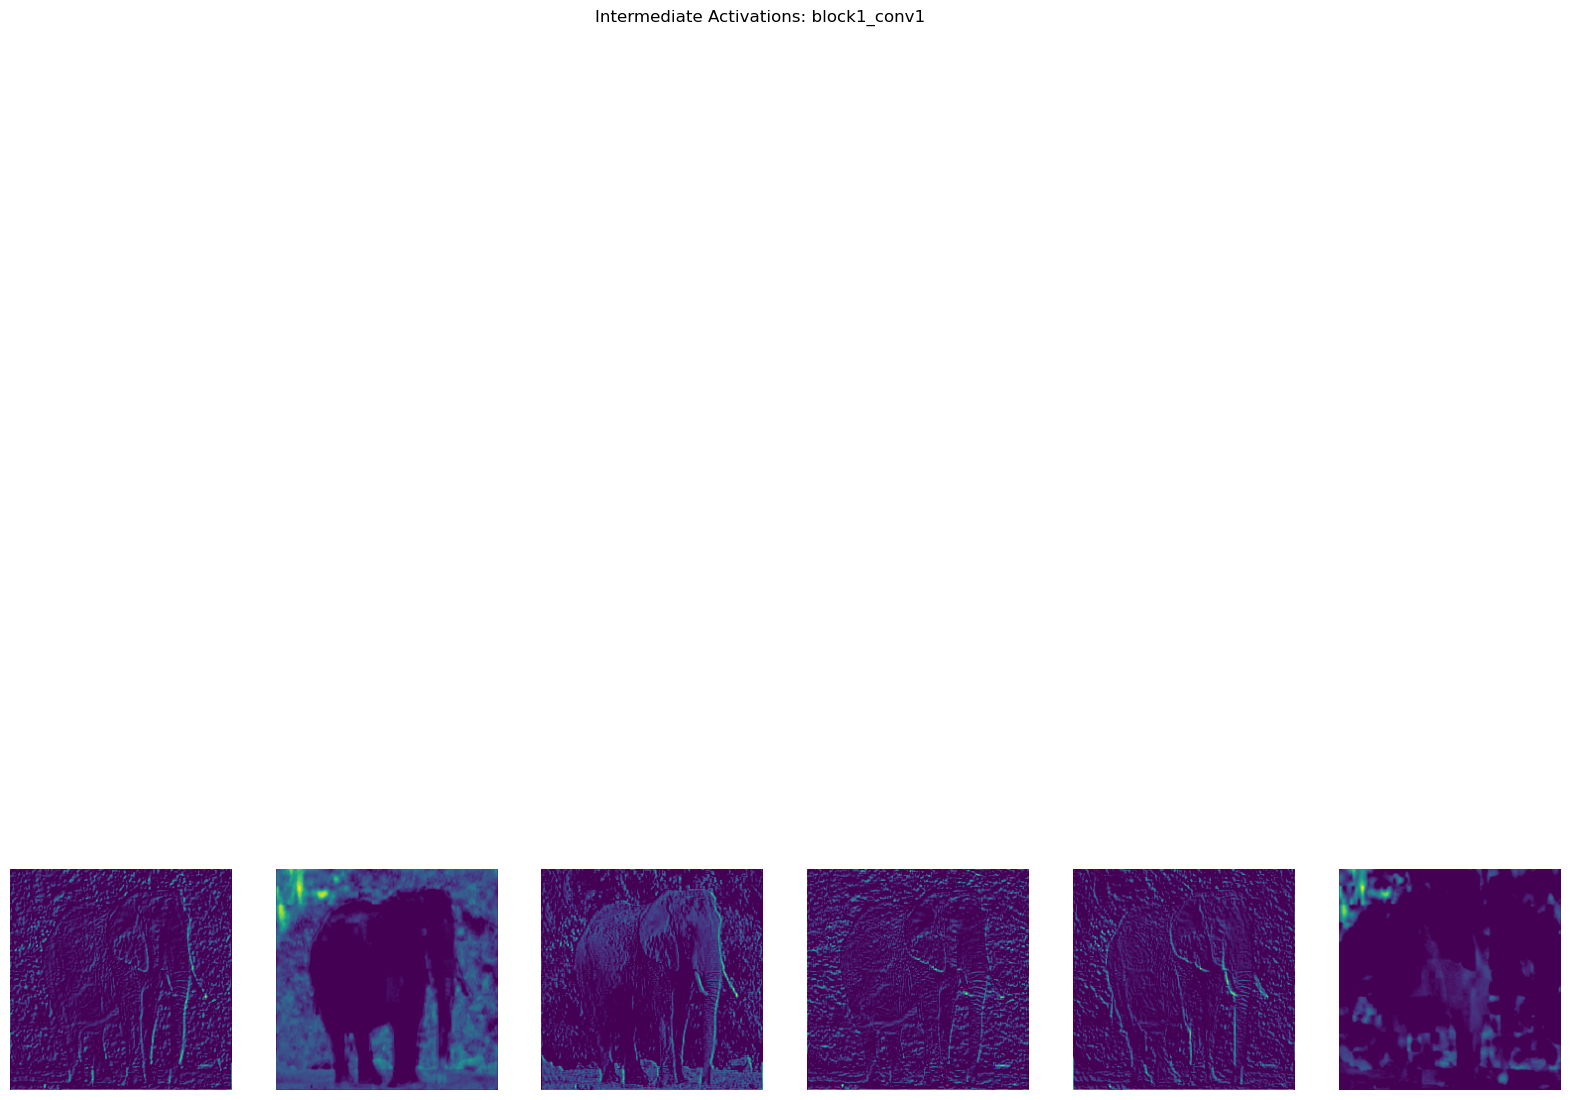

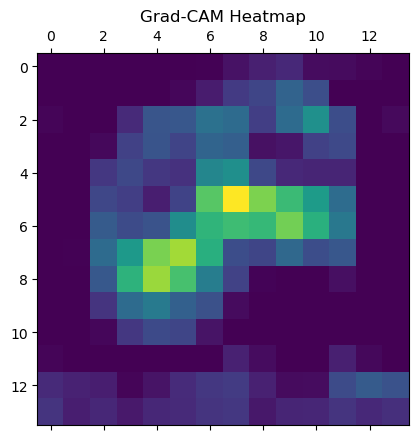

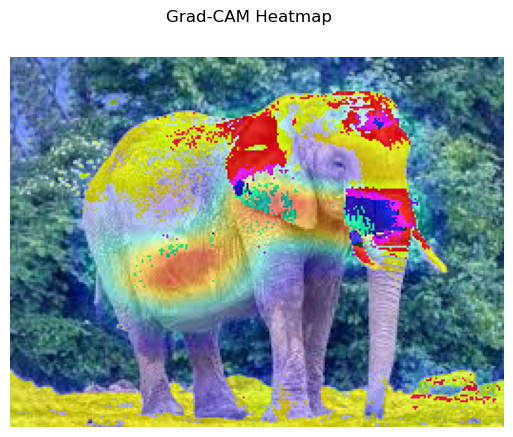

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import cv2

# ============================
# Load Pretrained Model
# ============================
model = VGG16(weights='imagenet')
model.summary()

# Load and preprocess input image
img_path = 'elephant.jpeg'  # Replace with your own image path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# ============================
# Part 1: Visualizing ConvNet Filters
# ============================
def visualize_filters(layer_name, n_filters=6):
    # Extract filters and biases from the specified layer
    filters, biases = model.get_layer(name=layer_name).get_weights()

    # Normalize filter values
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Plot the filters
    fig, axes = plt.subplots(1, n_filters, figsize=(20, 20))
    for i in range(n_filters):
        f = filters[:, :, :, i]
        axes[i].imshow(f[:, :, 0], cmap='gray')  # Visualize in grayscale
        axes[i].axis('off')
    plt.suptitle(f'ConvNet Filters: {layer_name}')
    plt.show()

visualize_filters('block1_conv1', n_filters=6)

# ============================
# Part 2: Visualizing Intermediate Activations
# ============================
def visualize_activations(layer_idx, n_filters=6):
    # Create a new model to output intermediate activations
    layer_outputs = [layer.output for layer in model.layers[:8]]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    # Compute activations
    activations = activation_model.predict(x)
    layer_activation = activations[layer_idx]

    # Plot the activations
    fig, axes = plt.subplots(1, n_filters, figsize=(20, 20))
    for i in range(n_filters):
        activation_map = layer_activation[0, :, :, i]
        axes[i].imshow(activation_map, cmap='viridis')
        axes[i].axis('off')
    layer_name = model.layers[layer_idx].name
    plt.suptitle(f'Intermediate Activations: {layer_name}')
    plt.show()

visualize_activations(layer_idx=1, n_filters=6)

# ============================
# Part 3: Visualizing Heatmaps (Grad-CAM)
# ============================
def compute_gradcam(model, img_array, layer_name, class_idx):
    # Build a model that outputs layer activations and predictions
    grad_model = Model(inputs=model.input, outputs=[model.get_layer(layer_name).output, model.output])

    # Compute the gradient of the class index wrt layer activations
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]
        grads = tape.gradient(loss, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the weighted average of the activation map
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

def visualize_gradcam(img_path, heatmap):
    # Superimpose heatmap on the original image
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize to match image dimensions
    heatmap = np.uint8(255 * heatmap)  # Convert heatmap to uint8 format [0, 255]
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply color map to heatmap

    # Superimpose the heatmap on the original image
    superimposed_img = np.uint8(heatmap * 0.4 + img)  # Ensure image is in uint8 format

    # Save and display the Grad-CAM result
    cv2.imwrite('gradcam_output.jpg', superimposed_img)
    # Convert to RGB for displaying in matplotlib (to avoid color issues)
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    plt.imshow(superimposed_img_rgb)
    plt.axis('off')
    plt.suptitle('Grad-CAM Heatmap')
    plt.show()

# Compute and visualize Grad-CAM for 'block5_conv3' and class index 386 (elephant)
heatmap = compute_gradcam(model, x, 'block5_conv3', 386)
plt.matshow(heatmap)
plt.title('Grad-CAM Heatmap')
plt.show()
visualize_gradcam(img_path, heatmap)
